In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.metrics import accuracy_score,mean_squared_error

In [2]:
# import warnings
# warnings.simplefilter('ignore')

# IMPORT DATASET USING PANDAS

In [3]:
dataset=pd.read_csv("heart.csv")

In [4]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
dataset.head(400)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
397,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
398,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1


In [6]:
info=["age","1:male,0:female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure", "serum cholestrol in mg/dl","fasting blood sugar>120 mg/dl","resting electrocardiographic results(values 0,1,2)","maximum heart rate achiveed","exercied induced angina","oldpeak = ST depression induced by rest","the slop of peak excercise ST segment"," number of major vessels(0-3) colored by floursopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i] +":\t\t\t"+info[i])

age:			age
sex:			1:male,0:female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			serum cholestrol in mg/dl
fbs:			fasting blood sugar>120 mg/dl
restecg:			resting electrocardiographic results(values 0,1,2)
thalach:			maximum heart rate achiveed
exang:			exercied induced angina
oldpeak:			oldpeak = ST depression induced by rest
slope:			the slop of peak excercise ST segment
ca:			 number of major vessels(0-3) colored by floursopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [7]:
dataset["target"]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [8]:
dataset.groupby("target").size()

target
0    499
1    526
dtype: int64

In [9]:
dataset.groupby("target").sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,28228,413,241,66919,125395,82,228,69426,274,798.5,582,578,1267
1,27567,300,725,67983,126755,71,315,83416,71,299.8,838,195,1115


In [10]:
dataset.shape

(1025, 14)

In [11]:
dataset.size  #rows *columns

14350

In [12]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
dataset["thal"].unique()                        #this gives unique values in a column

array([3, 2, 1, 0], dtype=int64)

#HISTOGRAM VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

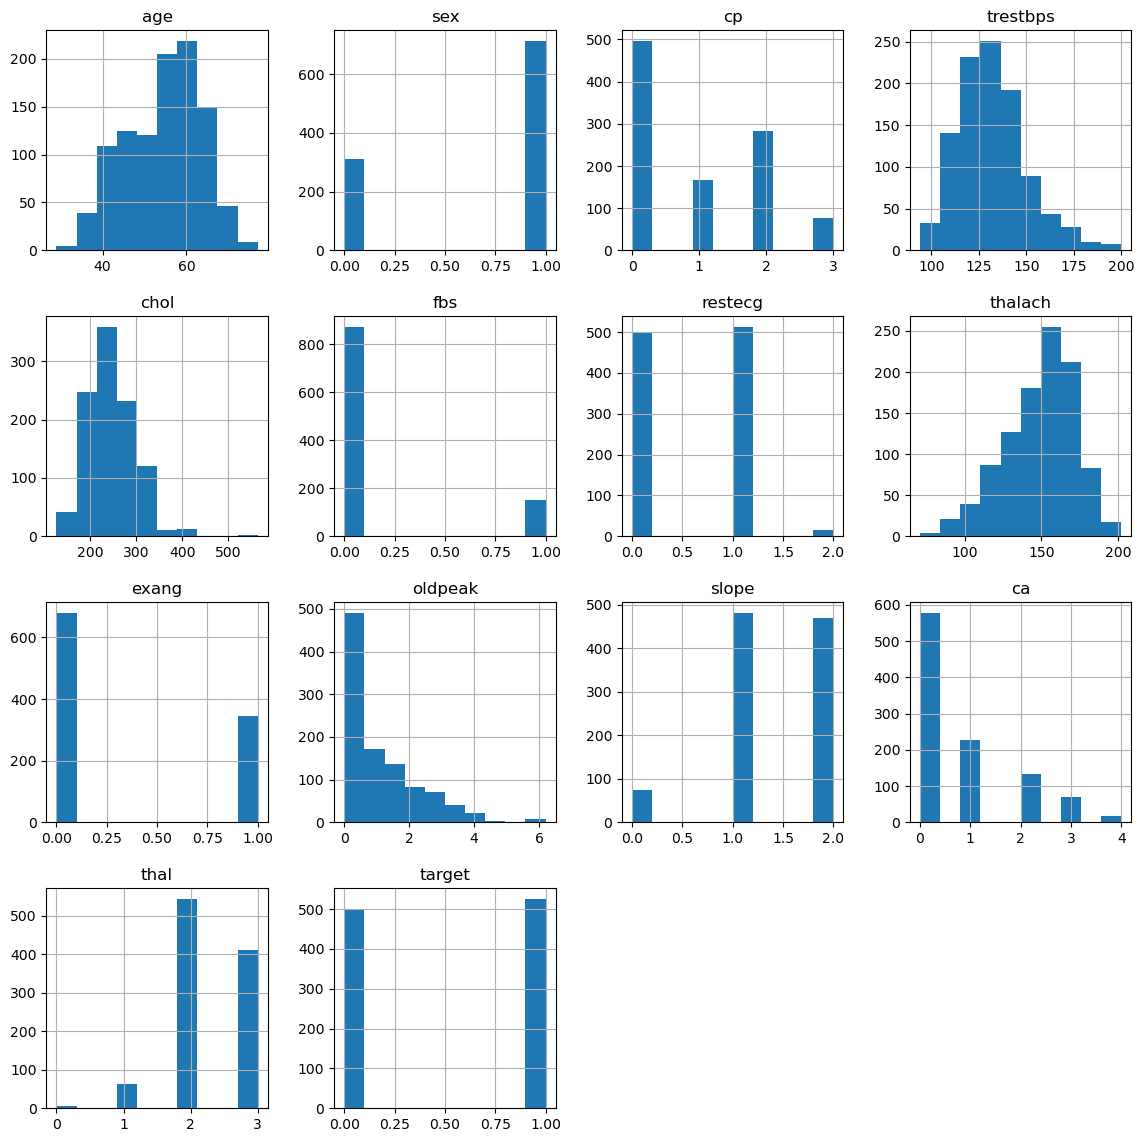

In [15]:
dataset.hist(figsize = (14,14))
plt.show

<Axes: xlabel='cp', ylabel='target'>

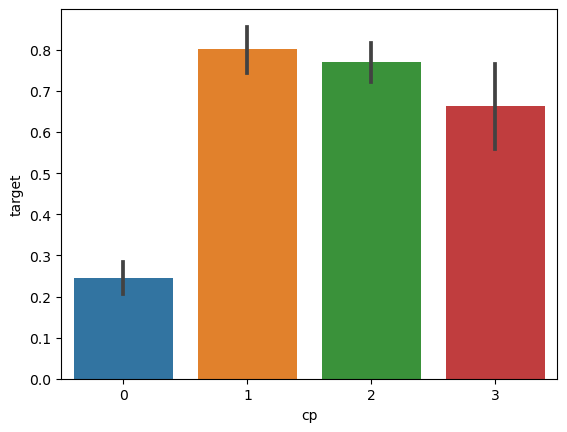

In [16]:
sns.barplot(x = dataset["cp"], y = dataset["target"])

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oldpeak', ylabel='Count'>

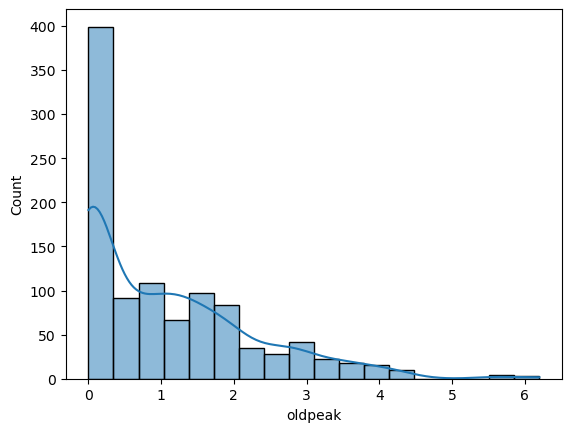

In [17]:
sns.histplot(dataset["oldpeak"],kde = True)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='chol', ylabel='Count'>

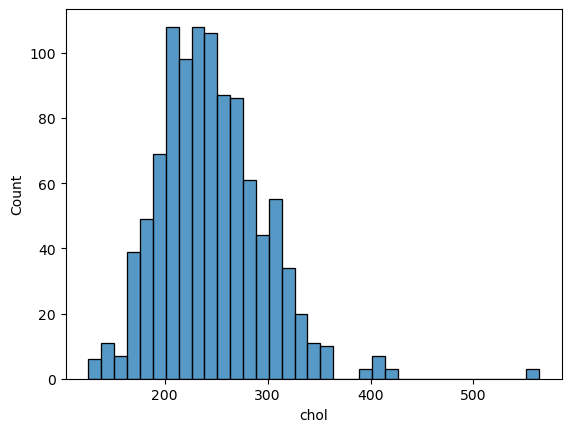

In [18]:
sns.histplot(dataset["chol"])

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cp', ylabel='Count'>

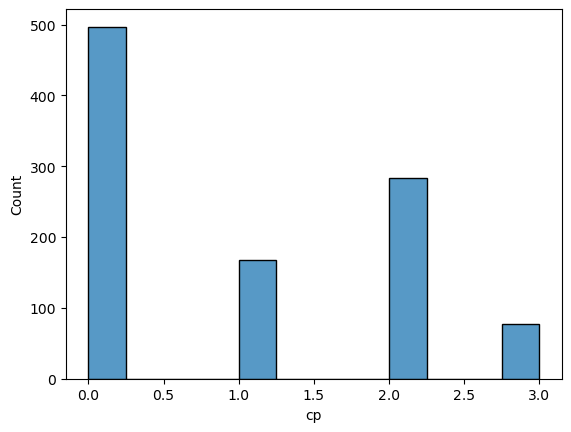

In [19]:
sns.histplot(dataset["cp"])

In [20]:
num = ["age","chol","trestbps","thalach","oldpeak"]

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

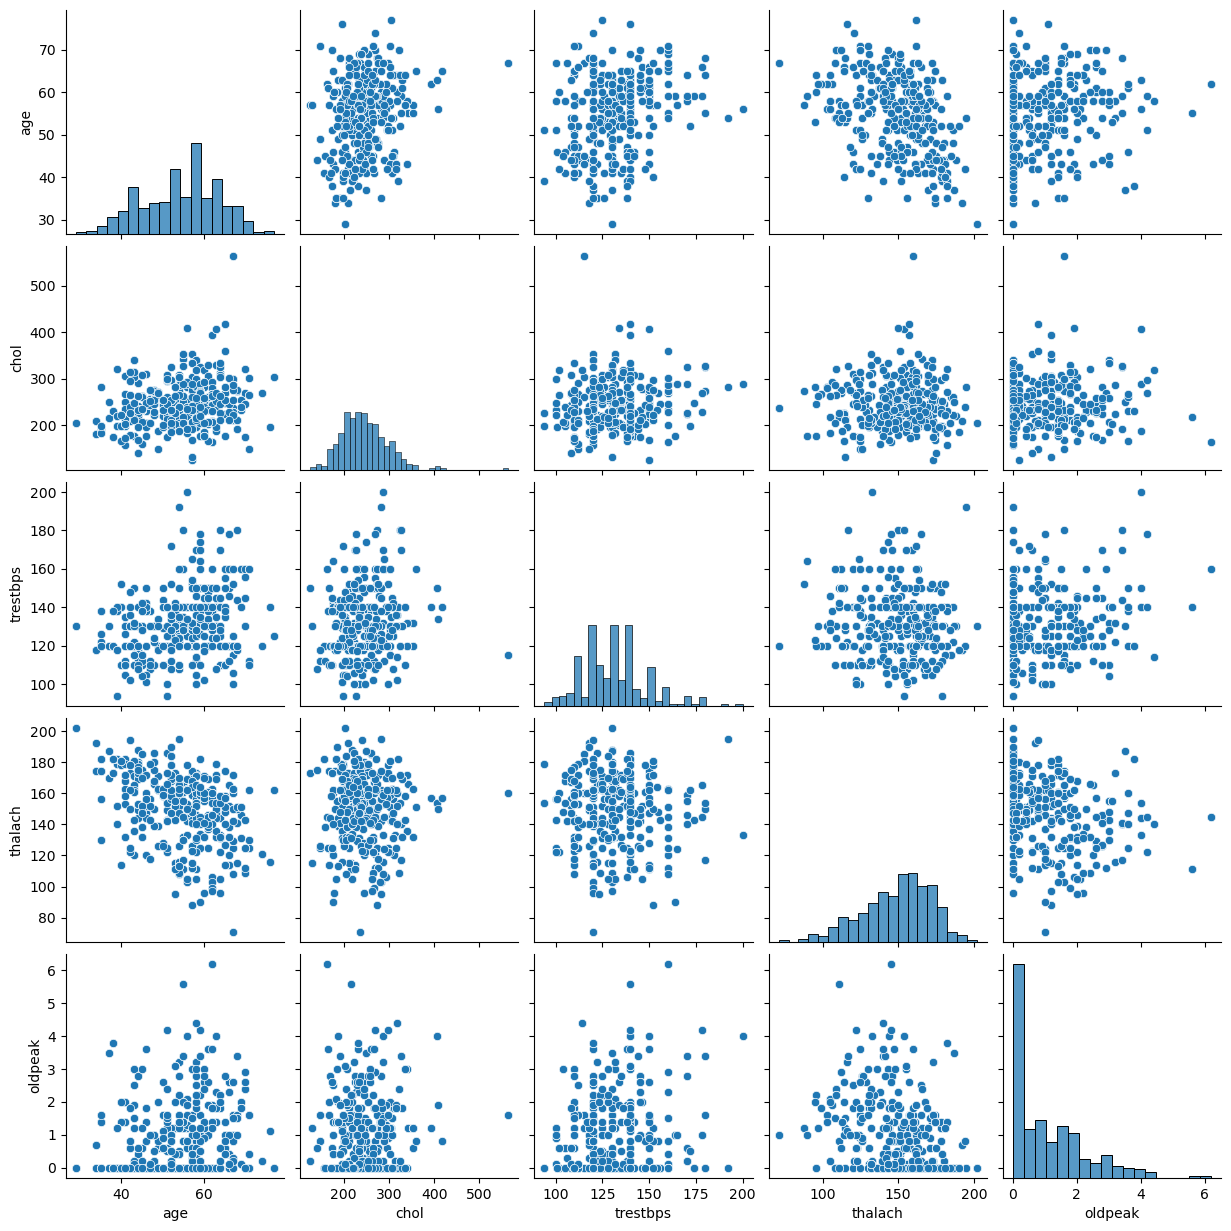

In [21]:
sns.pairplot(dataset[num])

target
1    526
0    499
Name: count, dtype: int64


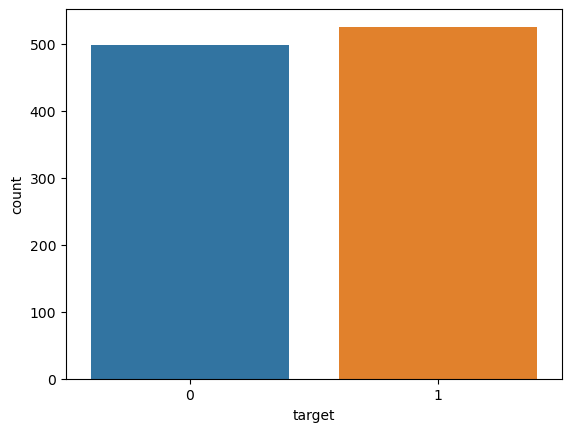

In [22]:
y = dataset['target']
sns.countplot(x = y)
z = dataset['target'].value_counts()
print(z)


# CORRELATION HEATMAP

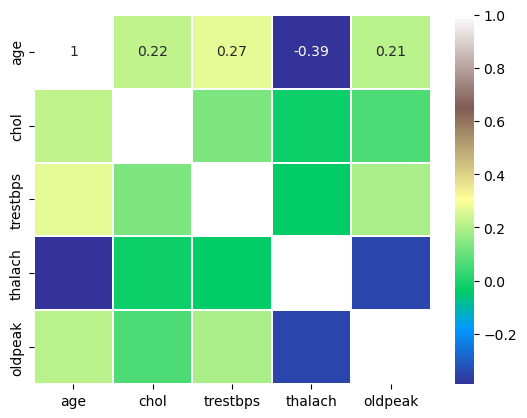

In [23]:
sns.heatmap(dataset[num].corr(),annot = True, cmap = 'terrain',linewidth = 0.1)
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0.5, 1.0, 'max heart rate of people who have heart disease')

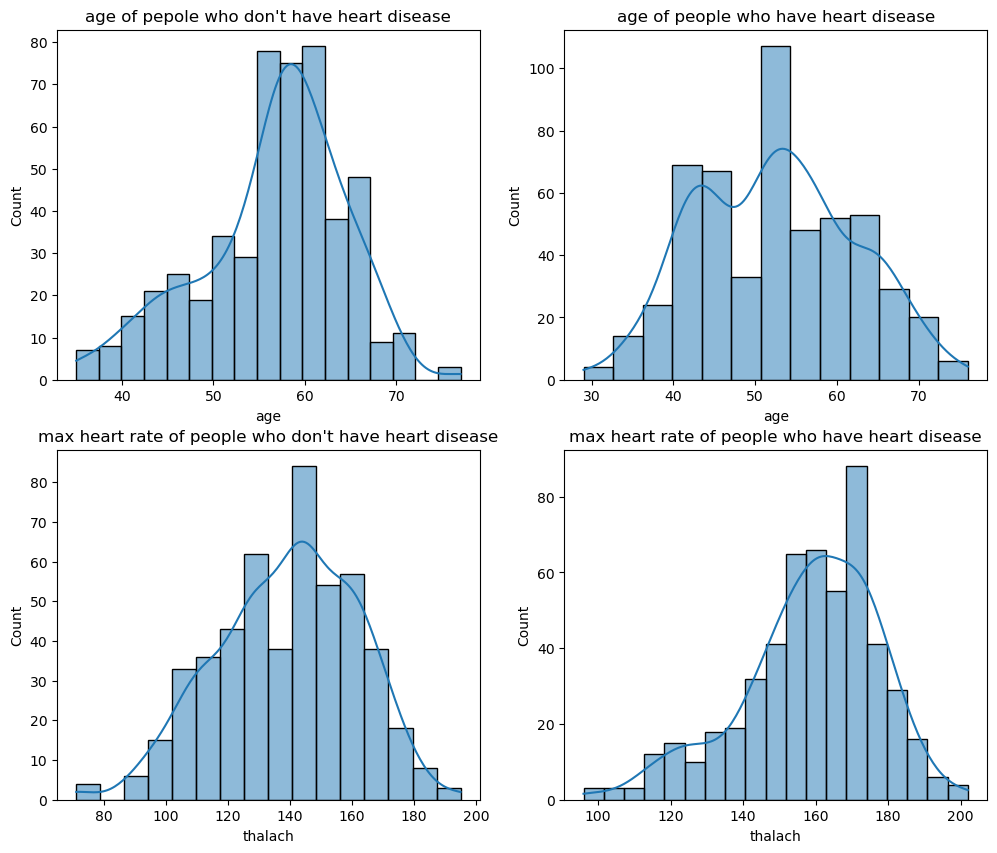

In [24]:
plt.figure(figsize =(12,10))
plt.subplot(221)
sns.histplot(dataset[dataset["target"] ==0]['age'], kde = True)
plt.title("age of pepole who don't have heart disease")
plt.subplot(222)
sns.histplot(dataset[dataset["target"] == 1]['age'],kde = True)
plt.title("age of people who have heart disease")
plt.subplot(223)
sns.histplot(dataset[dataset["target"] == 0]['thalach'],kde = True)
plt.title("max heart rate of people who don't have heart disease")
plt.subplot(224)
sns.histplot(dataset[dataset["target"] == 1]['thalach'],kde = True)
plt.title("max heart rate of people who have heart disease")

# DATA PREPROCESSING

In [25]:
dataset['target'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1020    False
1021    False
1022    False
1023    False
1024    False
Name: target, Length: 1025, dtype: bool

In [26]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
x, y = dataset,dataset.target   #splitting the features into x and y (x-> dataset  , y-> target)

In [28]:
x.drop('target',axis = 1, inplace = True)

In [29]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [31]:
x.shape

(1025, 13)

In [32]:
y.shape

(1025,)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [34]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [35]:
x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state = 10,test_size = 0.3)

In [37]:
x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [38]:
x_train

array([[ 0.06240209,  0.66150409,  0.05593123, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-1.15067305,  0.66150409,  1.02761788, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [ 0.39324077,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       ...,
       [-0.37871614,  0.66150409,  1.02761788, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.15815703, -1.51170646, -0.91575542, ..., -0.6241209 ,
        -0.73197147, -0.52212231],
       [ 0.834359  , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231]])

In [39]:
y_test

620    0
181    1
546    0
618    1
822    0
      ..
964    1
242    1
757    1
157    1
999    0
Name: target, Length: 308, dtype: int64

In [40]:
y_train

750    1
807    1
687    0
651    1
826    1
      ..
156    1
123    1
369    1
320    1
527    1
Name: target, Length: 717, dtype: int64

In [41]:
print(str(x_train.shape))
print(str(y_train.shape))
print(str(x_test.shape))
print(str(y_test.shape))


(717, 13)
(717,)
(308, 13)
(308,)


# MODEL SELECTION

# DECISION TREE

In [42]:
Category= ["no heart disease"," yes you have heart disease"]

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
prediction = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,prediction)*100
print(accuracy_dt)

# dt_1 = np.array([[54,0,0,122,120,1,0,178,0,0,0,1,0 ]])
dt_1 = np.array([[54,0,0,122,120,0,0,178,0,1,0,1,1 ]])
dt_1 = ss.transform(dt_1)
dt_arr = dt.predict(dt_1)
dt_arr[0]
print(Category[int(dt_arr[0])])


96.42857142857143
no heart disease


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
k_range = range(1,26)
scores = {}
h_score = 0
best_k = 0
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    prediction_knn = knn.predict(x_test)
    scores[k] = accuracy_score(y_test,prediction_knn)
    if scores[k] > h_score:
        h_score = scores[k]
        best_k = k

print("the best value of k is {} with score : {}".format(best_k,h_score))
        
        

the best value of k is 1 with score : 0.9512987012987013


In [47]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
prediction_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test,prediction_knn)*100
print(accuracy_score(y_test,prediction_knn)*100, "%")
print(mean_squared_error(y_test,prediction_knn)*100, "%")

prediction_knn


kn= np.array([[54,0,0,122,120,1,0,178,0,0,0,1,0 ]])
kn = ss.transform(kn)
kn_arr = knn.predict(kn)
kn_arr[0]
print(Category[int(kn_arr[0])])


95.12987012987013 %
4.870129870129871 %
no heart disease


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# SVC

In [49]:
from sklearn.svm import SVC


In [50]:
svc_model = SVC(C = 2.0, kernel = 'rbf', gamma = 'auto').fit(x_train,y_train)
Y_predict = svc_model.predict(x_test)
accuracy_svc  = accuracy_score(y_test,Y_predict)*100
print("Accuracy score: " ,accuracy_svc)

sv = np.array([[54,0,0,122,120,1,0,178,0,0,0,1,0 ]])
sv = ss.transform(sv)
sv_arr = svc_model.predict(sv)
sv_arr[0]
print(Category[int(sv_arr[0])])


Accuracy score:  94.48051948051948
no heart disease


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

rf.fit(x_train, y_train)
prediction_rf = rf.predict(x_test)

accuracy_rf  = accuracy_score(y_test, prediction_rf)*100

print("Random forest accuracy:{}". format(accuracy_rf))

#arr = np.array([[52,1,0,125,212,0,1,168,0,1,2,2,3]])
#arr=np.array([[58,0,0,100,248,0,0,122,0,1,1,0,2]])
#arr=np.array([[64,1,2,125,309,0,1,131,1,1.8,1,0,3]])
arr=np.array([[52,1,1,128,205,1,1,184,0,0,2,0,2]])
arr = ss.transform(arr)
arr_a = rf.predict(arr)
arr_a[0]
print(Category[int(arr_a[0])])


Random forest accuracy:96.1038961038961
 yes you have heart disease


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state = 10)

Lr.fit(x_train, y_train)

pred = Lr.predict(x_test)

Lr_acc = accuracy_score(y_test,pred)*100

Lr_acc

# arry = np.array([[52,1,0,125,212,0,1,168,0,1,2,2,3]])
# arry = np.array([[70,1,0,145,174,0,1,125,1,2.6,0,0,3]])
arry = np.array([[71,0,0,112,149,0,1,125,0,1.6,1,0,2]])
arry = np.array([[54,0,1,101,119,0,0,234,0,12.89,1,9,1]])
arry = ss.transform(arry)
arry_b= rf.predict(arry)
arry_b[0]



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [53]:
comparison = {
    "LogisticRegression":Lr_acc,
    "RandomForestClassifier":accuracy_rf,
    "SVC":accuracy_svc,
    "KNeighborsClassifier":accuracy_knn,
    "DecisionTreeClassifier":accuracy_dt
}


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


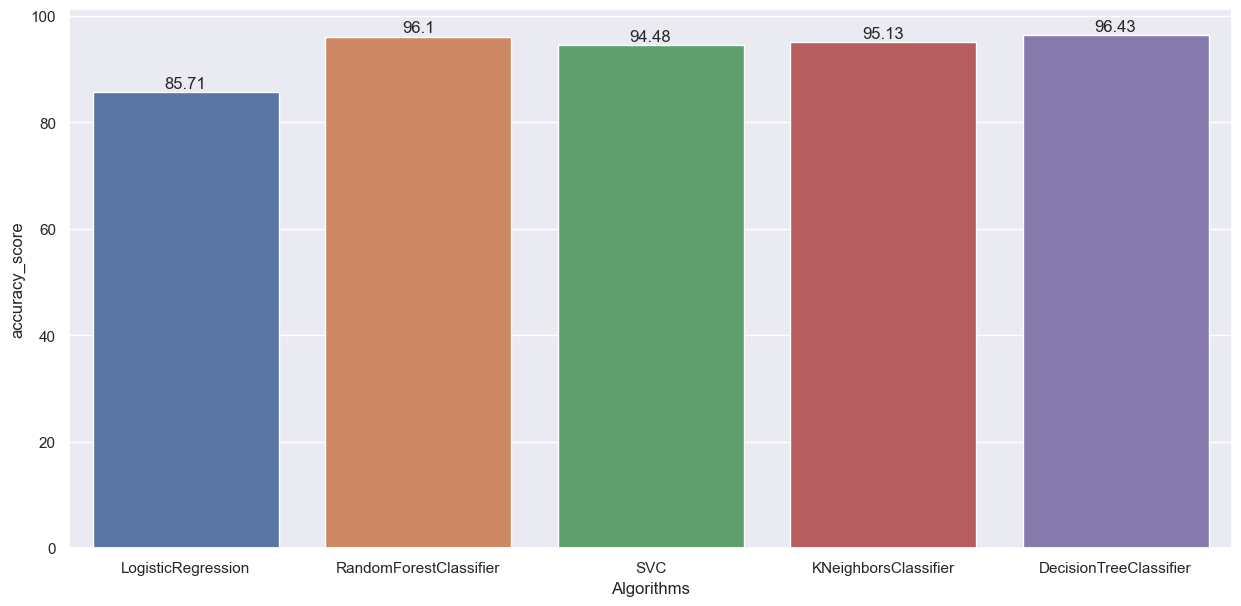

In [54]:
with sns.color_palette('muted'):
    algo_name = list(comparison.keys())
    scores = list(comparison.values())
    sns.set(rc = {'figure.figsize': (15,7)})
    plt.xlabel("Algorithms")
    plt.ylabel("accuracy_score")

    bar_plot = sns.barplot(x = algo_name, y = scores)
    for index,value in enumerate(scores):
        bar_plot.text(index, value +0.2, str(round(value,2)), ha = 'center', va = 'bottom')
    plt.show()